In [1]:
import pynucastro as pyna
from pynucastro.networks import StarKillerNetwork

library_file = "20180319default2"
mylibrary = pyna.rates.Library(library_file)

data_list = mylibrary.get_rates()

all_nuclei = ["p","he4","ne20","o20","f20","mg24","al27","o16","si28","s32","p31"]

escn_library = mylibrary.linking_nuclei(all_nuclei,with_reverse=True)
escn_tabular = ["f20--o20-toki","ne20--f20-toki","o20--f20-toki","f20--ne20-toki"]

In [2]:
#rc = pyna.RateCollection(libraries=[escn_library],rate_files=escn_tabular)
rc = pyna.RateCollection(libraries=[escn_library])

comp = pyna.Composition(rc.get_nuclei())
comp.set_nuc("o16", 0.5)
comp.set_nuc("ne20", 0.3)
comp.set_nuc("mg24", 0.1)
comp.set_nuc("o20", 1.e-5)
comp.set_nuc("f20", 1.e-5)
comp.set_nuc("p", 1.e-5)
comp.set_nuc("he4", 1.e-2)
comp.set_nuc("al27", 1.e-2)
comp.set_nuc("si28", 1.e-2)
comp.set_nuc("s32", 1.e-2)
comp.set_nuc("p31", 1.e-2)
comp.normalize()

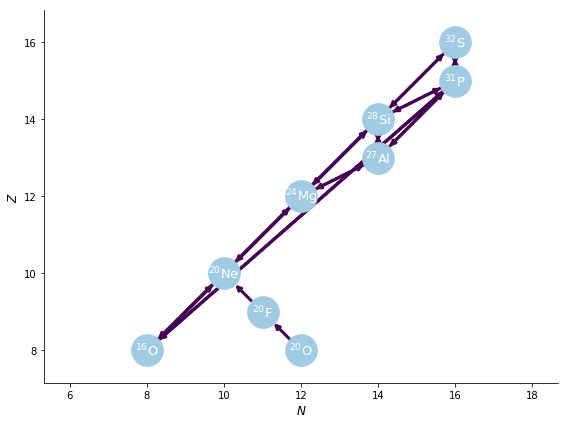

In [3]:
rc.plot(outfile="ecsn.png", T=1.e9, comp=comp)

In [4]:
new_rate_list = []
ydots = rc.evaluate_rates(rho=7.e9, T=1.e9, composition=comp)
for rate in rc.rates:
    if ydots[rate] >= 1.e-20 and rate.weak == False:
        new_rate_list.append(rate)

        
rc_new = pyna.RateCollection(rates=new_rate_list, rate_files=escn_tabular)

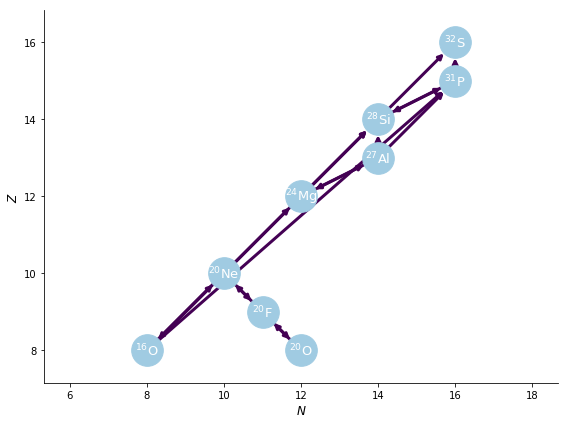

In [5]:
rc_new.plot(outfile="ecsn1.png", T=1.e9, comp=comp)

In [6]:
rc_new.evaluate_rates(rho=7.e9, T=1.e9, composition=comp)

OrderedDict([(ne20 --> he4 + o16, 4.6316695198155011e-18),
             (o16 + he4 --> ne20, 2163.4896055892013),
             (ne20 + he4 --> mg24, 470.46571662959479),
             (mg24 + he4 --> si28, 65.334259254490874),
             (al27 + p --> si28, 3786.5889540808494),
             (al27 + he4 --> p31, 0.057635811259143355),
             (si28 + he4 --> s32, 0.083227386105696174),
             (p31 + p --> s32, 2375.1304964039132),
             (o16 + o16 --> p + p31, 7.1549398954639525e-17),
             (o16 + o16 --> he4 + si28, 2.5949312230335836e-17),
             (mg24 + he4 --> p + al27, 0.2543862399303774),
             (al27 + p --> he4 + mg24, 5920.8184499852623),
             (si28 + he4 --> p + p31, 0.00019528201299493395),
             (p31 + p --> he4 + si28, 5491.9604426756096),
             (f20 --> o20, 0.0),
             (ne20 --> f20, 0.0),
             (o20 --> f20, 0.0),
             (f20 --> ne20, 0.0)])

In [7]:
rc.evaluate_rates(rho=7.e9, T=1.e9, composition=comp)

OrderedDict([(o20 --> f20, 2.702249897457067e-08),
             (f20 --> ne20, 3.2865051027731968e-08),
             (ne20 --> he4 + o16, 4.6316695198155011e-18),
             (mg24 --> he4 + ne20, 4.7447900376058227e-42),
             (si28 --> p + al27, 2.2702059658516468e-49),
             (si28 --> he4 + mg24, 9.1781555059816296e-47),
             (p31 --> he4 + al27, 9.7597296103699203e-47),
             (s32 --> p + p31, 2.5042620750581571e-36),
             (s32 --> he4 + si28, 2.4655741369058092e-33),
             (o16 + he4 --> ne20, 2163.4896055892013),
             (ne20 + he4 --> mg24, 470.46571662959479),
             (mg24 + he4 --> si28, 65.334259254490874),
             (al27 + p --> si28, 3786.5889540808494),
             (al27 + he4 --> p31, 0.057635811259143355),
             (si28 + he4 --> s32, 0.083227386105696174),
             (p31 + p --> s32, 2375.1304964039132),
             (o16 + o16 --> p + p31, 7.1549398954639525e-17),
             (o16 + o16 --> he4 + si

In [8]:
wd_net = StarKillerNetwork(rates=new_rate_list, rate_files=escn_tabular)

In [9]:
wd_net.rates

[ne20 --> he4 + o16,
 o16 + he4 --> ne20,
 ne20 + he4 --> mg24,
 mg24 + he4 --> si28,
 al27 + p --> si28,
 al27 + he4 --> p31,
 si28 + he4 --> s32,
 p31 + p --> s32,
 o16 + o16 --> p + p31,
 o16 + o16 --> he4 + si28,
 mg24 + he4 --> p + al27,
 al27 + p --> he4 + mg24,
 si28 + he4 --> p + p31,
 p31 + p --> he4 + si28,
 f20 --> o20,
 ne20 --> f20,
 o20 --> f20,
 f20 --> ne20]

In [10]:
len(wd_net.rates)

18

In [11]:
len(rc_new.rates)

18

In [10]:
wd_net.write_network(use_cse=True)

/Users/sailor/.local/lib/python3.6/site-packages/pynucastro-1.2.0-py3.6.egg/pynucastro/rates/rate.py:1224: RuntimeWarning: divide by zero encountered in log10
  pivot_table[row_pos, col_pos] = np.log10(data_heatmap[:, 5])


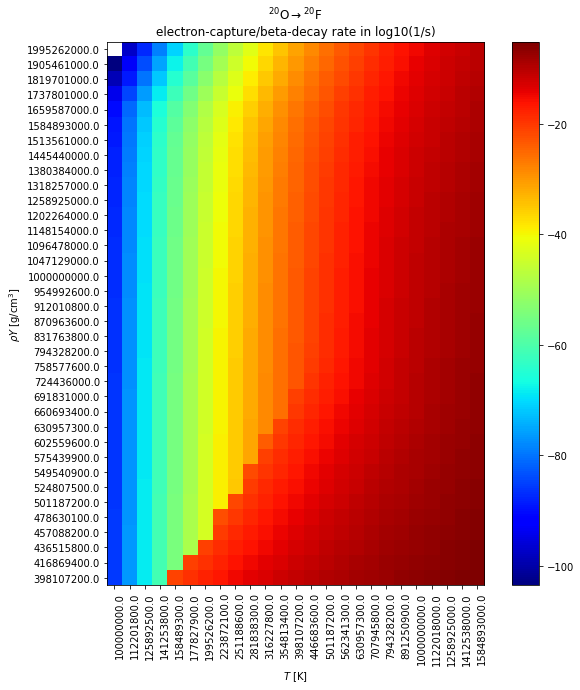

In [13]:
a = pyna.Rate("o20--f20-toki")
a.plot()

xinlong


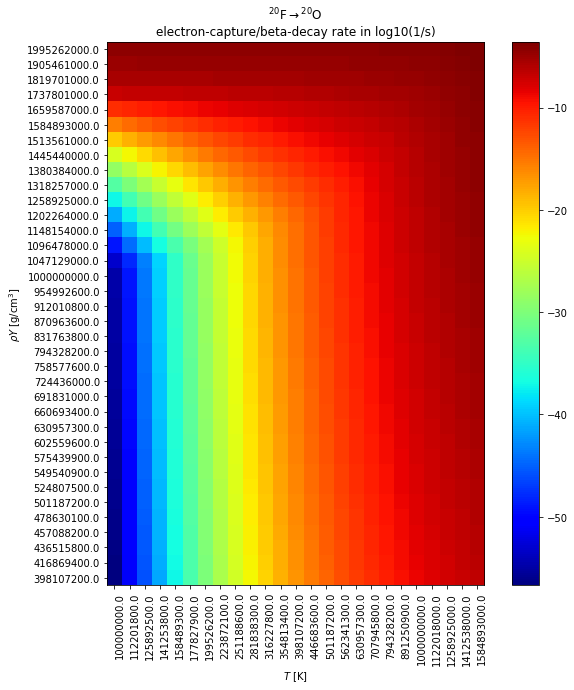

xinlong


In [14]:
b = pyna.Rate("f20--o20-toki")
b.plot()

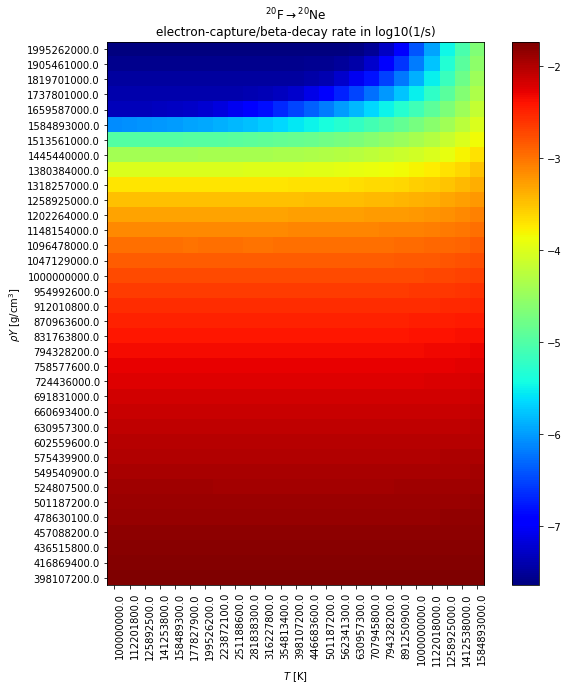

xinlong


In [15]:
c = pyna.Rate("f20--ne20-toki")
c.plot()

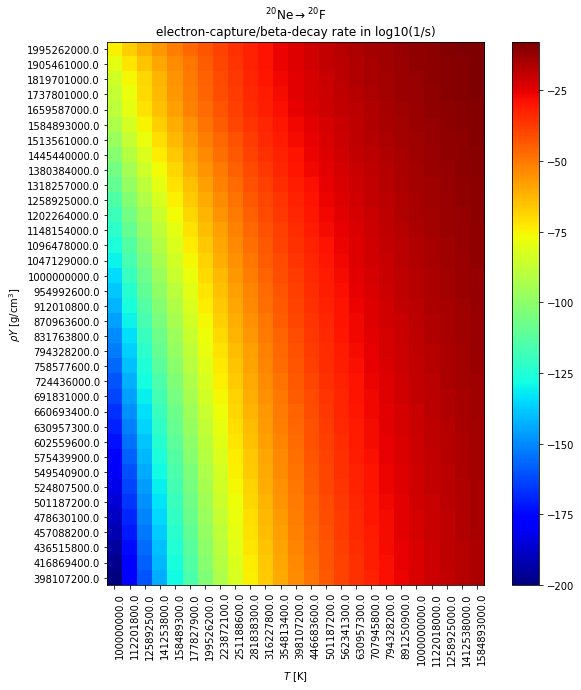

xinlong


In [16]:
d = pyna.Rate("ne20--f20-toki")
d.plot()

both below are Hnuc = -4.168105e+08

In [17]:
rc_new.evaluate_rates(rho=8.195386e9, T=7.335519e8, composition=comp)

OrderedDict([(ne20 --> he4 + o16, 1.6842598707771944e-28),
             (o16 + he4 --> ne20, 66.770401844842567),
             (ne20 + he4 --> mg24, 15.312373679403816),
             (mg24 + he4 --> si28, 0.55344853047766374),
             (al27 + p --> si28, 810.60140335885296),
             (al27 + he4 --> p31, 0.00028320497701554709),
             (si28 + he4 --> s32, 0.00034147631570186364),
             (p31 + p --> s32, 590.42416979232291),
             (o16 + o16 --> p + p31, 5.1256465605484603e-23),
             (o16 + o16 --> he4 + si28, 1.835316579676856e-23),
             (mg24 + he4 --> p + al27, 3.4257774674065294e-05),
             (al27 + p --> he4 + mg24, 679.96603917996515),
             (si28 + he4 --> p + p31, 6.3083358919379111e-09),
             (p31 + p --> he4 + si28, 570.82252501742903),
             (f20 --> o20, 1.2967690493984404e-07),
             (ne20 --> f20, 0.002077753334105239),
             (o20 --> f20, 0.0),
             (f20 --> ne20, 1.13797511657

In [18]:
rc_new.evaluate_rates(rho=8.191856e9, T=7.345557e8, composition=comp)

OrderedDict([(ne20 --> he4 + o16, 1.9047050909790568e-28),
             (o16 + he4 --> ne20, 68.001412625826305),
             (ne20 + he4 --> mg24, 15.557737861645995),
             (mg24 + he4 --> si28, 0.56710860933586804),
             (al27 + p --> si28, 816.74961374084796),
             (al27 + he4 --> p31, 0.000290485361368095),
             (si28 + he4 --> s32, 0.00035064899310246513),
             (p31 + p --> s32, 594.75292749839309),
             (o16 + o16 --> p + p31, 5.4768548770552538e-23),
             (o16 + o16 --> he4 + si28, 1.9612579474669584e-23),
             (mg24 + he4 --> p + al27, 3.5788343827167845e-05),
             (al27 + p --> he4 + mg24, 686.18005264659837),
             (si28 + he4 --> p + p31, 6.6476131976080014e-09),
             (p31 + p --> he4 + si28, 577.11572169915644),
             (f20 --> o20, 1.2967690493984404e-07),
             (ne20 --> f20, 0.002077753334105239),
             (o20 --> f20, 0.0),
             (f20 --> ne20, 1.137975116575

one of below is Hnuc = -4.168105e+08. one of below is Hnuc = 0

In [19]:
rc_new.evaluate_rates(rho=8.157834e9, T=7.490500e8, composition=comp)

OrderedDict([(ne20 --> he4 + o16, 1.0847764294909268e-27),
             (o16 + he4 --> ne20, 88.217013146925552),
             (ne20 + he4 --> mg24, 19.539216250843165),
             (mg24 + he4 --> si28, 0.80264404936328804),
             (al27 + p --> si28, 911.23476683774288),
             (al27 + he4 --> p31, 0.00041763246403212168),
             (si28 + he4 --> s32, 0.00051214685082717033),
             (p31 + p --> s32, 660.87221591977709),
             (o16 + o16 --> p + p31, 1.4097127298059696e-22),
             (o16 + o16 --> he4 + si28, 5.0548675788927223e-23),
             (mg24 + he4 --> p + al27, 6.670019413578802e-05),
             (al27 + p --> he4 + mg24, 783.91133675096182),
             (si28 + he4 --> p + p31, 1.3983677855620782e-08),
             (p31 + p --> he4 + si28, 675.83422528560561),
             (f20 --> o20, 1.2967690493984404e-07),
             (ne20 --> f20, 0.002077753334105239),
             (o20 --> f20, 0.0),
             (f20 --> ne20, 1.13797511657

In [20]:
rc_new.evaluate_rates(rho=8.153618e9, T=7.508423e8, composition=comp)

OrderedDict([(ne20 --> he4 + o16, 1.338919322859823e-27),
             (o16 + he4 --> ne20, 91.037638656819624),
             (ne20 + he4 --> mg24, 20.088157552900466),
             (mg24 + he4 --> si28, 0.83714743736847974),
             (al27 + p --> si28, 923.45143245820395),
             (al27 + he4 --> p31, 0.00043650013011856603),
             (si28 + he4 --> s32, 0.00053629764389401973),
             (p31 + p --> s32, 669.36109019243554),
             (o16 + o16 --> p + p31, 1.5817934394338019e-22),
             (o16 + o16 --> he4 + si28, 5.6728032023287476e-23),
             (mg24 + he4 --> p + al27, 7.1941858734570182e-05),
             (al27 + p --> he4 + mg24, 796.90736862629467),
             (si28 + he4 --> p + p31, 1.5301589850373862e-08),
             (p31 + p --> he4 + si28, 688.94148801347967),
             (f20 --> o20, 1.2967690493984404e-07),
             (ne20 --> f20, 0.002077753334105239),
             (o20 --> f20, 0.0),
             (f20 --> ne20, 1.13797511657

In [ ]:
jijilij